# First Project Work Week Assignment



### Business Understanding

<font color='blue'>
_Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific._
</font>

__Goal__

Predict default yes/no given the data.

 - Can we predict with X level of confidence?
 - Can I (something something banking jargon) interest rates (Paul will fill out)
 - Maximize sensitivity even if false positives.
 - Logistic Regression?
 - Sensitivity and Specificity (Need to determine what level is appropriate?)

20% of the observations are default scenarios

### Data Meaning Type

<font color='blue'>
_Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file._
</font>

#### Attribute Information

This data set was attained from the UCI Machine Learning Repository. It is a 6 month history of 30,000 Taiwanese credit account balances and transactions.

Each observation contains a binary reponse variable "default" with values 1 indicating a default occured and 0 indicating no default occured.

The following explanatory variables are included:

 - LIMIT_BAL = Total credit amount allowed
 
 - SEX
     -  1 = Male
     -  2 = Female
 
 - EDUCATION
     - 1 = Graduate School
     - 2 = University
     - 3 = High School
     - 4 = Other
   
 - MARRIAGE
     - 1 = Married
     - 2 = Single
     - 3 = Other
       
 - AGE = Credit holder age in years
 
Payment history (2005)
 - PAY_0 = September
 - PAY_2 = August
 - PAY_3 = July
 - PAY_4 = June
 - PAY_5 = May
 - PAY_6 = April
      -  -1 = payment received on time
      -   1 = payment received one month late
      -   2 = payment received two months late
      -   "......"
      -   9 = payment received nine months late or more
         
Statement amount (NT dollars, 2005)
 - BILL_AMT1 = September
 - BILL_AMT2 = August
 - BILL_AMT3 = July
 - BILL_AMT4 = June
 - BILL_AMT5 = May
 - BILL_AMT6 = April
 
Previous Payment (NT dollars, 2005).
 - PAY_AMT1 = September
 - PAY_AMT2 = August
 - PAY_AMT3 = July
 - PAY_AMT4 = June
 - PAY_AMT5 = May
 - PAY_AMT6 = April

Original Source Data Set Information  
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

In [21]:
#import the data
import pandas as pd
df = pd.read_csv('Input/DefaultCreditcardClients.csv')
df.rename(columns={'default payment next month':'default'}, inplace=True)
df.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

Pandas defaulted all data types to integer.
The source has no explicit data type descriptions but there is enough context to safely change the datatypes of all continuous variables to floats.

In [22]:
if 'ID' in df:
    del df['ID']

In [30]:
import numpy as np

# Change numeric values to floats
continuous_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
                       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                       'PAY_AMT6']
ordinal_features = ['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categ_features = ['SEX', 'default']
df[continuous_features] = df[continuous_features].astype(np.float64)
#df[categ_features] = df[categ_features].astype(np.object)
df[ordinal_features] = df[ordinal_features].astype(np.int64)
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

### Data Quality

<font color='blue'>
_Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods._

</font>


In [31]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [25]:
dfs=df.sample(n=30, replace=False)

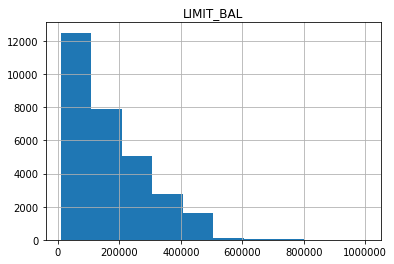

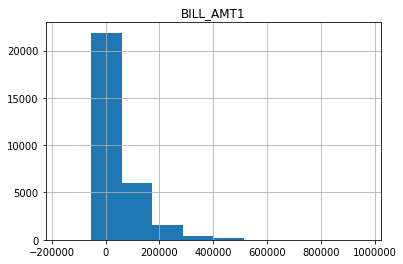

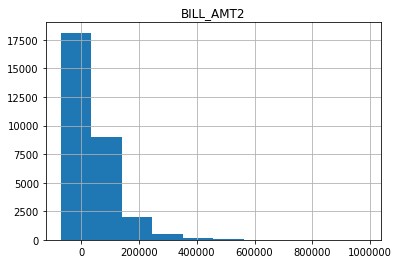

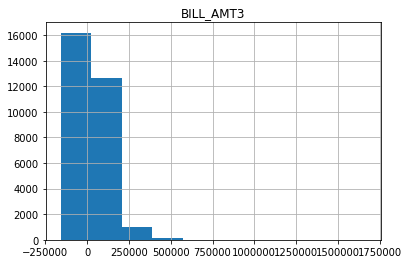

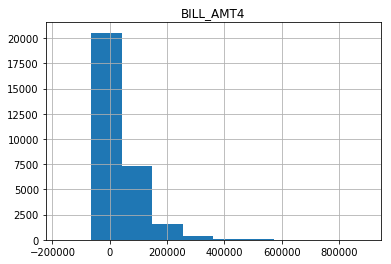

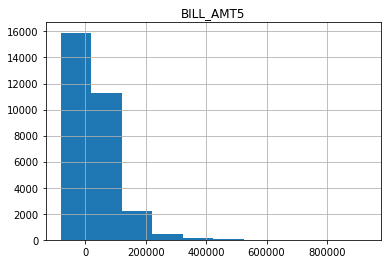

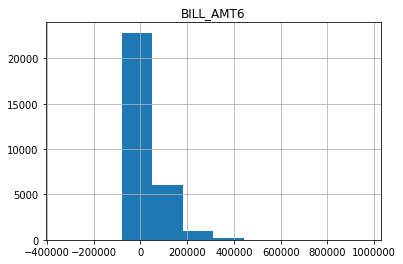

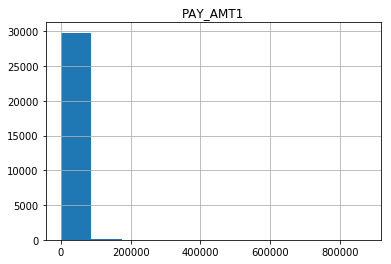

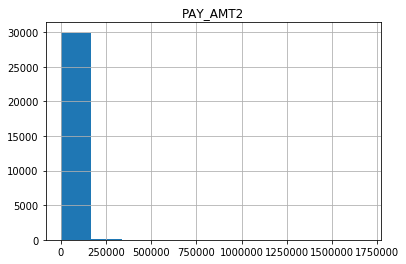

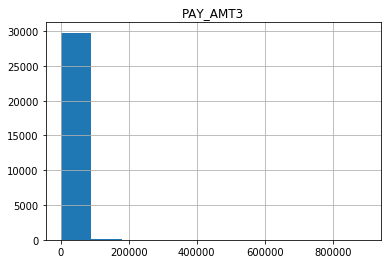

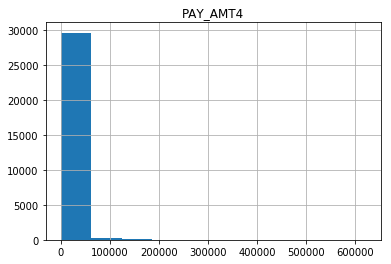

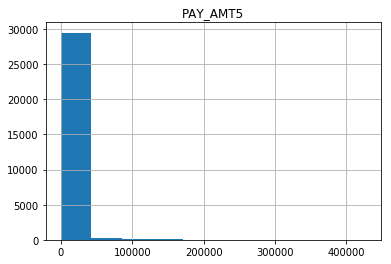

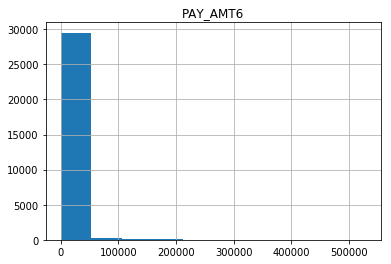

In [6]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
lb = df.hist(['LIMIT_BAL'])
ba1 = df.hist(['BILL_AMT1'])
ba2 = df.hist(['BILL_AMT2'])
ba3 = df.hist(['BILL_AMT3'])
ba4 = df.hist(['BILL_AMT4']) 
ba5 = df.hist(['BILL_AMT5'])
ba6 = df.hist(['BILL_AMT6'])
pa1 = df.hist(['PAY_AMT1'])
pa2 = df.hist(['PAY_AMT2'])
pa3 = df.hist(['PAY_AMT3'])
pa4 = df.hist(['PAY_AMT4'])
pa5 = df.hist(['PAY_AMT5'])
pa6 = df.hist(['PAY_AMT6'])

#look at records (maybe 18 and 19) there were not sensical - delinquent payments but no balance due. Maybe about 17 of these.

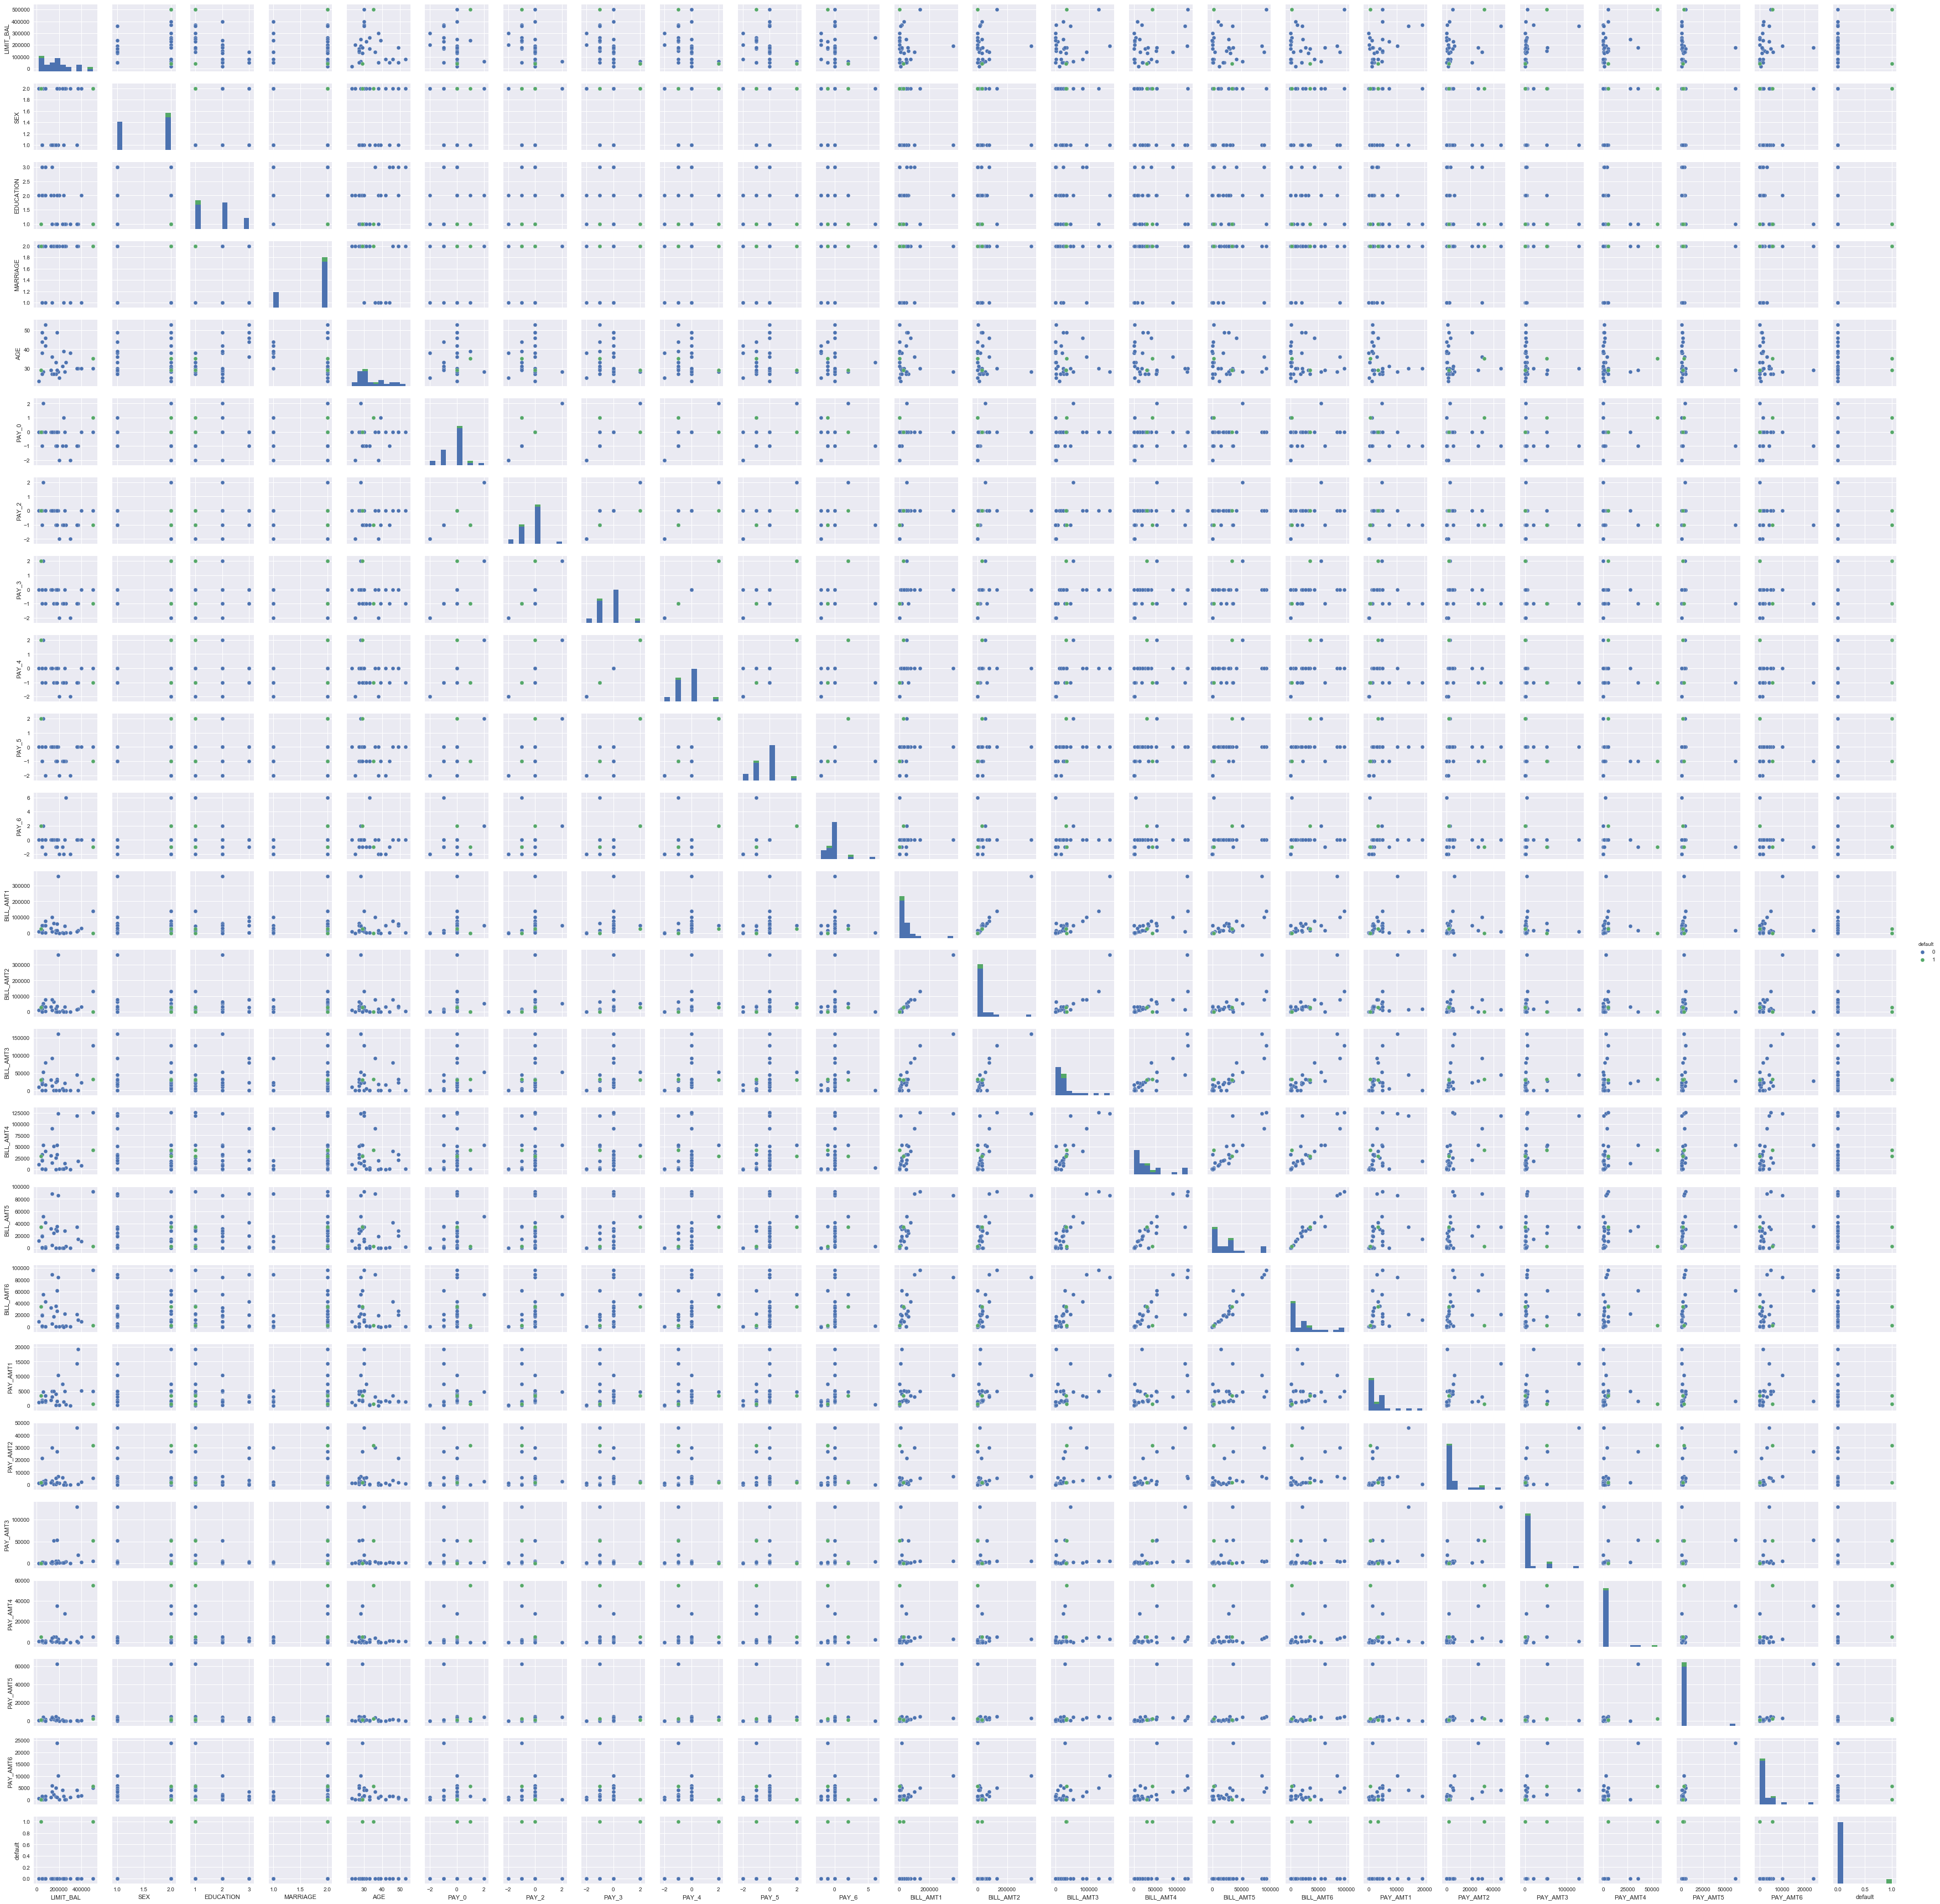

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
sns.pairplot(dfs, hue="default", size=2)

# from pandas.plotting import scatter_matrix
# ax = scatter_matrix(dfs,figsize=(50,50))

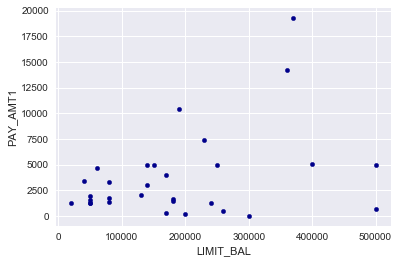

In [8]:
ax1 = dfs.plot.scatter(x='LIMIT_BAL',
...                       y='PAY_AMT1',
...                       c='DarkBlue')

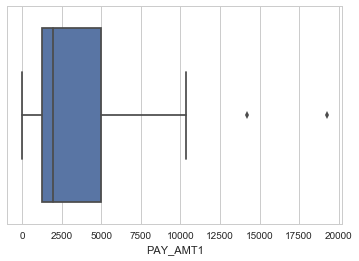

In [9]:
#ab = dfs.boxplot(['PAY_AMT1'],range)
>>> import seaborn as sns
>>> sns.set(style="whitegrid")

>>> ax = sns.boxplot(x=dfs['PAY_AMT1'])

### Simple Statistics

<font color='blue'>
_Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful._
</font>

In [26]:
#python code
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Visualize Attributes

<font color='blue'>
_Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate._
</font>

In [11]:
#python code

### Explore Joint Attributes

<font color='blue'>
_Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships._
</font>


In [12]:
#python code

### Explore Attributes and Class

<font color='blue'>
_Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification)._
</font>


In [13]:
#python code

### New Features

<font color='blue'>
_Are there other features that could be added to the data or created from existing features? Which ones?_
</font>

In [14]:
#python code

### Exceptional Work

<font color='blue'>
_You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results._
</font>

In [40]:
#python code
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

continuous_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
                       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                       'PAY_AMT6']
ordinal_features = ['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

df_pca = df[continuous_features].astype(np.float64)
#df[categ_features] = df[categ_features].astype(np.object)
df_pca[ordinal_features] = df[ordinal_features].astype(np.int64)

#Center means around 0
#Scale the data so all std dev = 1.
#Transpose so sample in rows rather than columns so we use .T to transpose
scaled_data = preprocessing.scale(df_pca.T)

#create a PCA object
pca=PCA()

#All PCA math in here, loading scores and variation each component accounts for




# def get_feature_names_from_weights(weights, names):
#     tmp_array = []
#     for comp in weights:
#         tmp_string = ''
#         for fidx,f in enumerate(names):
#             if fidx>0 and comp[fidx]>=0:
#                 tmp_string+='+'
#             tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
#         tmp_array.append(tmp_string)
#     return tmp_array

# pca = PCA(n_components=2)
# X_pca = pca.fit(X).transform(X) # fit data and then transform it

# #print ('pca:', pca.components_)
# pca_weight_strings = get_feature_names_from_weights(pca.components_, df.columns) 
# df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


### Appendix

#### Jupyter Formatting Cheatsheet
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
    


<font color='blue'> 
You are to perform analysis of a data set: exploring the statistical summaries of the features,
visualizing the attributes, and making conclusions from the visualizations and analysis. Follow the
CRISP-DM framework in your analysis (you are not performing all of the CRISP-DM outline, only
the portions relevant to understanding and visualization). This report is worth 20% of the final
grade. Please upload a report (one per team) with all code used, visualizations, and text in a single
document. The format of the document can be PDF, *.ipynb, or HTML. You can write the report in
whatever format you like, but it is easiest to turn in the rendered Jupyter notebook.

__A note on grading:__ This lab is mostly about visualizing and understanding your dataset. The
largest share of the points is from how you interpret the visuals that you make. Making the visuals
is not enough to satisfy each of the rubrics below—you should appropriately explain what the
implications of the visualizations are. In other words, expect about 20% of the available points for
visuals that have no substantive discussion.
</font>

In [16]:
import numba.cuda
import numpy as np
import math

my_gpu = numba.vectorize(df.AGE)
print (my_gpu)

<function vectorize.<locals>.wrap at 0x000001D4AEBEB2F0>
